# Hochschule Bonn-Rhein-Sieg
### Scientific Experimentation and Evaluation, SS18
### Assignment 3

submitted by: `Abhishek Padalkar, Max Mensing, Pranjal Dhole`

In [1]:
import numpy as np
from math import atan2

import pandas
import sys, os

import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
%matplotlib inline

In [2]:
data = pandas.read_csv('data/motionData.csv', header=[0,1,2])
display(data.head(10))

,Straight Motion,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Right turn Motion,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Left turn Motion,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0
,Right wheel,Unnamed: 1_level_1,Left Wheel,Unnamed: 3_level_1,Right wheel,Unnamed: 5_level_1,Left Wheel,Unnamed: 7_level_1,Right wheel,Unnamed: 9_level_1,Left Wheel,Unnamed: 11_level_1
,x(cm),y(cm),x(cm),y(cm),x(cm),y(cm),x(cm),y(cm),x(cm),y(cm),x(cm),y(cm)
0,40.3,20.3,40.2,34.9,10.9,1.5,25.1,4.2,25.0,51.5,10.8,54.3
1,40.3,20.3,40.3,34.8,10.3,1.2,24.5,3.5,25.0,51.3,11.2,54.1
2,40.2,20.9,40.0,35.3,10.4,1.3,24.6,4.0,25.1,51.4,10.9,54.0
3,40.2,20.5,40.0,35.0,10.9,1.6,25.1,4.3,25.0,51.6,10.5,54.9
4,40.5,20.1,40.4,34.6,10.4,1.4,24.2,4.0,25.1,51.4,10.9,54.0
5,40.5,20.0,40.4,34.5,10.0,0.9,24.4,3.2,25.2,51.1,10.5,54.9
6,40.6,20.3,40.8,34.8,11.0,1.6,25.2,4.8,24.8,51.9,10.5,54.6
7,40.4,19.9,40.6,34.3,11.2,2.0,24.5,4.9,24.0,52.2,9.9,54.7


In [3]:
database = data.as_matrix()
data_array = database.copy()
straight_motion_data = data_array[:,0:4]
right_turn_data = data_array[:,4:8]
left_turn_data = data_array[:,8:12]

In [4]:
# Final position of robot LED centers
wheel_Rx_s = straight_motion_data[:,0]
wheel_Ry_s = straight_motion_data[:,1]
wheel_Lx_s = straight_motion_data[:,2]
wheel_Ly_s = straight_motion_data[:,3]

wheel_Rx_r = right_turn_data[:,0]
wheel_Ry_r = right_turn_data[:,1]
wheel_Lx_r = right_turn_data[:,2]
wheel_Ly_r = right_turn_data[:,3]

wheel_Rx_l = left_turn_data[:,0]
wheel_Ry_l = left_turn_data[:,1]
wheel_Lx_l = left_turn_data[:,2]
wheel_Ly_l = left_turn_data[:,3]

In [5]:
# Starting position of robot LED centers
wheel_Rx0_s = 0.0
wheel_Ry0_s = 20.6
wheel_Lx0_s = 0.0
wheel_Ly0_s = 35.1

wheel_Rx0_r = 0.0
wheel_Ry0_r = 20.6
wheel_Lx0_r = 0.0
wheel_Ly0_r = 35.1

wheel_Rx0_l = 0.0
wheel_Ry0_l = 20.6
wheel_Lx0_l = 0.0
wheel_Ly0_l = 35.1

In [6]:
# supposed distance to be travelled by robot
s_rx0_distance = 40.5
s_ry0_distance = 0
s_lx0_distance = 40.5
s_ly0_distance = 0

r_rx0_distance = 10
r_ry0_distance = 20
r_lx0_distance = 25
r_ly0_distance = 30

l_rx0_distance = 25
l_ry0_distance = 30
l_lx0_distance = 10
l_ly0_distance = 20

In [7]:
# Distance travelled by robot wheels
s_rx_distance = np.absolute(wheel_Rx_s - wheel_Rx0_s)
s_ry_distance = np.absolute(wheel_Ry_s - wheel_Ry0_s)
s_lx_distance = np.absolute(wheel_Lx_s - wheel_Lx0_s)
s_ly_distance = np.absolute(wheel_Ly_s - wheel_Ly0_s)

r_rx_distance = np.absolute(wheel_Rx_r - wheel_Rx0_r)
r_ry_distance = np.absolute(wheel_Ry_r - wheel_Ry0_r)
r_lx_distance = np.absolute(wheel_Lx_r - wheel_Lx0_r)
r_ly_distance = np.absolute(wheel_Ly_r - wheel_Ly0_r)

l_rx_distance = np.absolute(wheel_Rx_l - wheel_Rx0_l)
l_ry_distance = np.absolute(wheel_Ry_l - wheel_Ry0_l)
l_lx_distance = np.absolute(wheel_Lx_l - wheel_Lx0_l)
l_ly_distance = np.absolute(wheel_Ly_l - wheel_Ly0_l)

# Mean of distance travelled by wheels
s_rx_distance_mean = np.round(s_rx_distance.mean(), decimals=1)
s_ry_distance_mean = np.round(s_ry_distance.mean(), decimals=1)
s_lx_distance_mean = np.round(s_lx_distance.mean(), decimals=1)
s_ly_distance_mean = np.round(s_ly_distance.mean(), decimals=1)

r_rx_distance_mean = np.round(r_rx_distance.mean(), decimals=1)
r_ry_distance_mean = np.round(r_ry_distance.mean(), decimals=1)
r_lx_distance_mean = np.round(r_lx_distance.mean(), decimals=1)
r_ly_distance_mean = np.round(r_ly_distance.mean(), decimals=1)

l_rx_distance_mean = np.round(l_rx_distance.mean(), decimals=1)
l_ry_distance_mean = np.round(l_ry_distance.mean(), decimals=1)
l_lx_distance_mean = np.round(l_lx_distance.mean(), decimals=1)
l_ly_distance_mean = np.round(l_ly_distance.mean(), decimals=1)

### Statistical Evaluation

In [8]:
display('Mean distance travelled')

print('Left turn motion:')
print('right wheel (x, y):', l_rx_distance_mean, l_ry_distance_mean)
print('left wheel (x, y):', l_lx_distance_mean, l_ly_distance_mean)

print('\nRight turn motion:')
print('right wheel (x, y):', r_rx_distance_mean, r_ry_distance_mean)
print('left wheel (x, y):', r_lx_distance_mean, r_ly_distance_mean)

print('\nStraight motion:')
print('right wheel (x, y):', s_rx_distance_mean, s_ry_distance_mean)
print('left wheel (x, y):', s_lx_distance_mean, s_ly_distance_mean)

'Mean distance travelled'

Left turn motion:
right wheel (x, y): 24.9 30.9
left wheel (x, y): 10.6 19.2

Right turn motion:
right wheel (x, y): 10.7 19.1
left wheel (x, y): 24.8 30.9

Straight motion:
right wheel (x, y): 40.5 0.4
left wheel (x, y): 40.3 0.4


In [9]:
display('Mean final position')

print('Left turn motion:')
print('right wheel (x, y):',
      np.round(np.mean(wheel_Rx_l), decimals=1),
      np.round(np.mean(wheel_Ry_l), decimals=1))
print('left wheel (x, y):',
      np.round(np.mean(wheel_Lx_l), decimals=1),
      np.round(np.mean(wheel_Ly_l), decimals=1))

print('\nRight turn motion:')
print('right wheel (x, y):',
      np.round(np.mean(wheel_Rx_r), decimals=1),
      np.round(np.mean(wheel_Ry_r), decimals=1))
print('left wheel (x, y):',
      np.round(np.mean(wheel_Lx_r), decimals=1),
      np.round(np.mean(wheel_Ly_r), decimals=1))

print('\nStraight motion:')
print('right wheel (x, y):',
      np.round(np.mean(wheel_Rx_s), decimals=1),
      np.round(np.mean(wheel_Ry_s), decimals=1))
print('left wheel (x, y):',
      np.round(np.mean(wheel_Lx_s), decimals=1),
      np.round(np.mean(wheel_Ly_s), decimals=1))

'Mean final position'

Left turn motion:
right wheel (x, y): 24.9 51.5
left wheel (x, y): 10.6 54.3

Right turn motion:
right wheel (x, y): 10.7 1.5
left wheel (x, y): 24.8 4.2

Straight motion:
right wheel (x, y): 40.5 20.7
left wheel (x, y): 40.3 35.2


In [10]:
# Left-turn
l_rx_dm = np.round(abs(l_rx_distance_mean - l_rx0_distance), decimals=1)
l_ry_dm = np.round(abs(l_ry_distance_mean - l_ry0_distance), decimals=1)
l_lx_dm = np.round(abs(l_lx_distance_mean - l_lx0_distance), decimals=1)
l_ly_dm = np.round(abs(l_ly_distance_mean - l_ly0_distance), decimals=1)

# Right turn
r_rx_dm = np.round(abs(r_rx_distance_mean - r_rx0_distance), decimals=1)
r_ry_dm = np.round(abs(r_ry_distance_mean - r_ry0_distance), decimals=1)
r_lx_dm = np.round(abs(r_lx_distance_mean - r_lx0_distance), decimals=1)
r_ly_dm = np.round(abs(r_ly_distance_mean - r_ly0_distance), decimals=1)

# straight
s_rx_dm = np.round(abs(s_rx_distance_mean - s_rx0_distance), decimals=1)
s_ry_dm = np.round(abs(s_ry_distance_mean - s_ry0_distance), decimals=1)
s_lx_dm = np.round(abs(s_lx_distance_mean - s_lx0_distance), decimals=1)
s_ly_dm = np.round(abs(s_ly_distance_mean - s_ly0_distance), decimals=1)

In [11]:
display('Mean deviation in distance travelled')

print('Left turn motion:')
print('right wheel (x, y):', l_rx_dm, l_ry_dm)
print('left wheel (x, y):',
      np.round(abs(l_lx_distance_mean - l_lx0_distance), decimals=1),
      np.round(abs(l_ly_distance_mean - l_ly0_distance), decimals=1))

print('\nRight turn motion:')
print('right wheel (x, y):',
      np.round(abs(r_rx_distance_mean - r_rx0_distance), decimals=1),
      np.round(abs(r_ry_distance_mean - r_ry0_distance), decimals=1))
print('left wheel (x, y):',
      np.round(abs(r_lx_distance_mean - r_lx0_distance), decimals=1),
      np.round(abs(r_ly_distance_mean - r_ly0_distance), decimals=1))

print('\nStraight motion:')
print('right wheel (x, y):',
      np.round(abs(s_rx_distance_mean - s_rx0_distance), decimals=1),
      np.round(abs(s_ry_distance_mean - s_ry0_distance), decimals=1))
print('left wheel (x, y):',
      np.round(abs(s_lx_distance_mean - s_lx0_distance), decimals=1),
      np.round(abs(s_ly_distance_mean - s_ly0_distance), decimals=1))

'Mean deviation in distance travelled'

Left turn motion:
right wheel (x, y): 0.1 0.9
left wheel (x, y): 0.6 0.8

Right turn motion:
right wheel (x, y): 0.7 0.9
left wheel (x, y): 0.2 0.9

Straight motion:
right wheel (x, y): 0.0 0.4
left wheel (x, y): 0.2 0.4


In [12]:
display('Mean angular deviation in robot final pose')

print('Left turn motion:')
print('right wheel (degrees):',
      np.round(abs(np.degrees(atan2(np.round(abs(l_ry_distance_mean), decimals=1),
                           np.round(abs(l_rx_distance_mean), decimals=1))
                     - atan2(abs(l_ry0_distance), abs(l_rx0_distance)))), decimals=2))
print('left wheel (degrees):',
      np.round(abs(np.degrees(atan2(np.round(abs(l_ly_distance_mean), decimals=1),
                           np.round(abs(l_lx_distance_mean), decimals=1))
                     - atan2(abs(l_ly0_distance), abs(l_lx0_distance)))), decimals=2))

print('\nRight turn motion:')
print('right wheel (degrees):',
      np.round(abs(np.degrees(atan2(np.round(abs(r_ry_distance_mean), decimals=1),
                           np.round(abs(r_rx_distance_mean), decimals=1))
                     - atan2(abs(r_ry0_distance), abs(r_rx0_distance)))), decimals=2))
print('left wheel (degrees):',
      np.round(abs(np.degrees(atan2(np.round(abs(r_ly_distance_mean), decimals=1),
                           np.round(abs(r_lx_distance_mean), decimals=1))
                     - atan2(abs(r_ly0_distance), abs(r_lx0_distance)))), decimals=2))

print('\nStraight motion:')
print('right wheel (degrees):',
      np.round(abs(np.degrees(atan2(np.round(abs(s_ry_distance_mean), decimals=1),
                           np.round(abs(s_rx_distance_mean), decimals=1))
                     - atan2(abs(s_ry0_distance), abs(s_rx0_distance)))), decimals=2))
print('left wheel (degrees):',
      np.round(abs(np.degrees(atan2(s_ly_distance_mean, s_lx_distance_mean)
                     - atan2(abs(s_ly0_distance), abs(s_lx0_distance)))), decimals=2))

'Mean angular deviation in robot final pose'

Left turn motion:
right wheel (degrees): 0.94
left wheel (degrees): 2.34

Right turn motion:
right wheel (degrees): 2.69
left wheel (degrees): 1.06

Straight motion:
right wheel (degrees): 0.57
left wheel (degrees): 0.57


In [13]:
display('Standard Deviation in final pose of robot')

print('Left turn motion:')
print('right wheel (x, y):',
      np.round(np.std(wheel_Rx_l), decimals=1),
      np.round(np.std(wheel_Ry_l), decimals=1))
print('left wheel (x, y):',
      np.round(np.std(wheel_Lx_l), decimals=1),
      np.round(np.std(wheel_Ly_l), decimals=1))

print('\nRight turn motion:')
print('right wheel (x, y):',
      np.round(np.std(wheel_Rx_r), decimals=1),
      np.round(np.std(wheel_Ry_r), decimals=1))
print('left wheel (x, y):',
      np.round(np.std(wheel_Lx_r), decimals=1),
      np.round(np.std(wheel_Ly_r), decimals=1))

print('\nStraight motion:')
print('right wheel (x, y):',
      np.round(np.std(wheel_Rx_s), decimals=1),
      np.round(np.std(wheel_Ry_s), decimals=1))
print('left wheel (x, y):',
      np.round(np.std(wheel_Lx_s), decimals=1),
      np.round(np.std(wheel_Ly_s), decimals=1))

'Standard Deviation in final pose of robot'

Left turn motion:
right wheel (x, y): 0.3 0.3
left wheel (x, y): 0.3 0.3

Right turn motion:
right wheel (x, y): 0.3 0.2
left wheel (x, y): 0.4 0.5

Straight motion:
right wheel (x, y): 0.2 0.5
left wheel (x, y): 0.3 0.5


In [14]:
from sklearn.neighbors import KernelDensity
import seaborn as sb

In [15]:
motions = ['Straight ', 'Right-turn ', 'Left-turn ']

In [16]:
wheels = ['left-wheel ', 'right-wheel ']

In [17]:
def get_distribution(data, num_samples=500):
    x = np.linspace(-10, 60, num_samples)
    samples = data[np.newaxis].T

    kernel = KernelDensity(bandwidth=1.5).fit(samples)
    log_dens = kernel.score_samples(x[:, np.newaxis])

    return x, np.exp(log_dens)

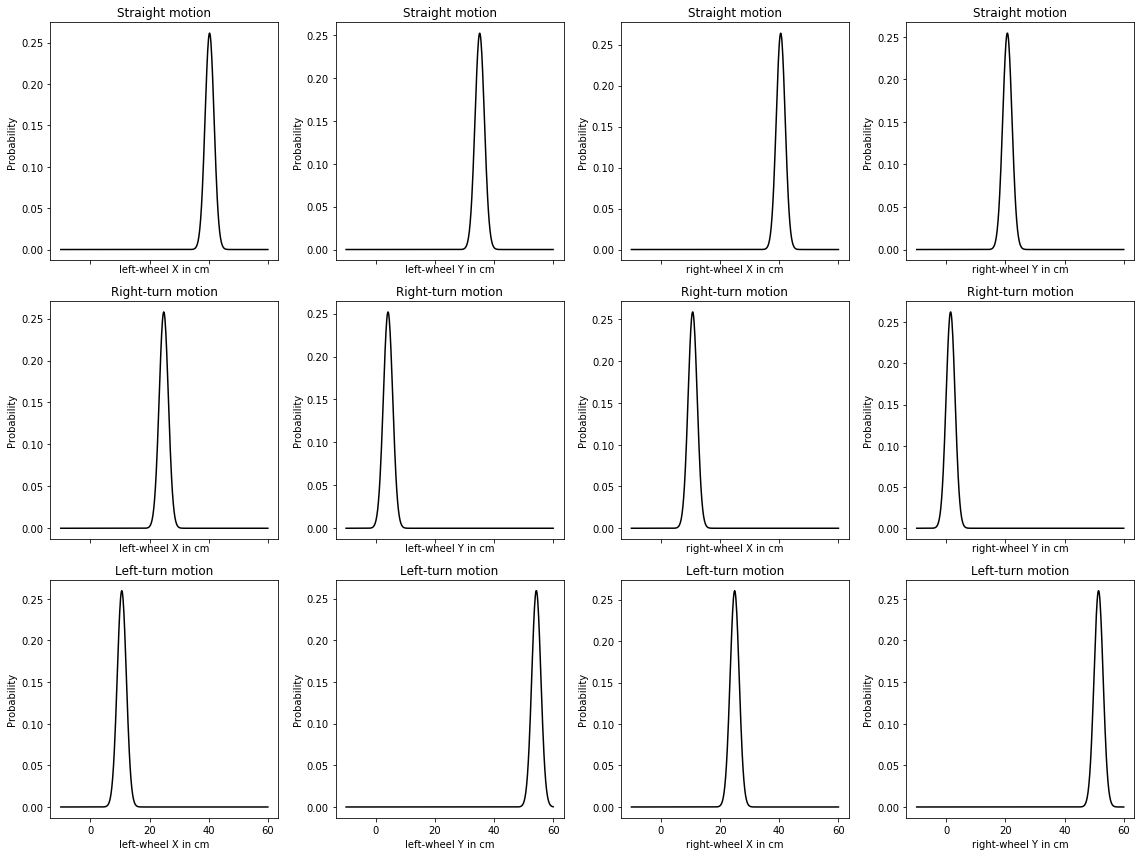

In [21]:
f, axes = plt.subplots(3, 4, figsize=(16, 12), sharex=True)

# Straight motion
x, y = get_distribution(wheel_Lx_s)
axes[0,0].plot(x, y, color='black')
axes[0,0].set_xlabel(wheels[0]+'X in cm')
axes[0,0].set_ylabel('Probability')
axes[0,0].set_title(motions[0] + 'motion')

x, y = get_distribution(wheel_Ly_s)
axes[0,1].plot(x, y, color='black')
axes[0,1].set_xlabel(wheels[0]+'Y in cm')
axes[0,1].set_ylabel('Probability')
axes[0,1].set_title(motions[0] + 'motion')

x, y = get_distribution(wheel_Rx_s)
axes[0,2].plot(x, y, color='black')
axes[0,2].set_xlabel(wheels[1]+'X in cm')
axes[0,2].set_ylabel('Probability')
axes[0,2].set_title(motions[0] + 'motion')

x, y = get_distribution(wheel_Ry_s)
axes[0,3].plot(x, y, color='black')
axes[0,3].set_xlabel(wheels[1]+'Y in cm')
axes[0,3].set_ylabel('Probability')
axes[0,3].set_title(motions[0] + 'motion')

# Right Turn motion
x, y = get_distribution(wheel_Lx_r)
axes[1,0].plot(x, y, color='black')
axes[1,0].set_xlabel(wheels[0]+'X in cm')
axes[1,0].set_ylabel('Probability')
axes[1,0].set_title(motions[1] + 'motion')

x, y = get_distribution(wheel_Ly_r)
axes[1,1].plot(x, y, color='black')
axes[1,1].set_xlabel(wheels[0]+'Y in cm')
axes[1,1].set_ylabel('Probability')
axes[1,1].set_title(motions[1] + 'motion')

x, y = get_distribution(wheel_Rx_r)
axes[1,2].plot(x, y, color='black')
axes[1,2].set_xlabel(wheels[1]+'X in cm')
axes[1,2].set_ylabel('Probability')
axes[1,2].set_title(motions[1] + 'motion')

x, y = get_distribution(wheel_Ry_r)
axes[1,3].plot(x, y, color='black')
axes[1,3].set_xlabel(wheels[1]+'Y in cm')
axes[1,3].set_ylabel('Probability')
axes[1,3].set_title(motions[1] + 'motion')

# Left turn motion
x, y = get_distribution(wheel_Lx_l)
axes[2,0].plot(x, y, color='black')
axes[2,0].set_xlabel(wheels[0]+'X in cm')
axes[2,0].set_ylabel('Probability')
axes[2,0].set_title(motions[2] + 'motion')

x, y = get_distribution(wheel_Ly_l)
axes[2,1].plot(x, y, color='black')
axes[2,1].set_xlabel(wheels[0]+'Y in cm')
axes[2,1].set_ylabel('Probability')
axes[2,1].set_title(motions[2] + 'motion')

x, y = get_distribution(wheel_Rx_l)
axes[2,2].plot(x, y, color='black')
axes[2,2].set_xlabel(wheels[1]+'X in cm')
axes[2,2].set_ylabel('Probability')
axes[2,2].set_title(motions[2] + 'motion')

x, y = get_distribution(wheel_Ry_l)
axes[2,3].plot(x, y, color='black')
axes[2,3].set_xlabel(wheels[1]+'Y in cm')
axes[2,3].set_ylabel('Probability')
axes[2,3].set_title(motions[2] + 'motion')

f.savefig('images/gaussian_fits')
plt.tight_layout()
plt.show()
plt.close()